# **<ins style="color:red">Feature Engineering</ins>**
- __Feature Transformation__
  - __Mathematical Transformation__
## **Mathematical Transformations** : convert the data distribution into normal distribution.
- **Log Transform**
- **Reciprocal Transform**
- **Power Transform(sq/sqrt2)**
- **Box-Cox Transform**
- **Yeo-Johnson Transform**

### **What happend after applying the transformation.**
- Data distribution (PDF) is converted into a Normal distribution.

### **<ins style="color:green">Function Transformer</ins>**
- __Sklearn__
  - __Function Transformer__
    - `Log Transform`
    - `Reciprocal Transform`
    - `Sq / Sqrt`
    - `Custom` : Create Your Own formula to transform the columns
  - __Power Transformer__
    - `Box-Cox Transform`
    - `Yeo-Johnson`
  - __Quantile Transformer__

### **How to find if data is normal?**
- sns.histplot(kde=True) visualization
- pandas skew() = 0
- QQ-Plot(statistic)

### **Log Transform**
- Taking log of each value is _log transform_.
- Log Transform is not apply on -ve value.
- Use for `Right Skewed Data`.
- __Right Skewed Data__ ---> __Normal Distribution__
- Linear Model (Linear Regression and Logistic Regression) Perform better on Log Transformation.
- Scaled it linearly.
### **Reciprocal Transform(1/x)**
- All big values become small values and small values become big values.
### **Square Transform(x2)**
- Use for `Left Skewed Data`.
- __Left Skewed Data__ ---> __Normal Distribution__
### **Squared Root Transform(√x)**
- Take square root of each value.

# image store
<html>
    <body>
         <img src="/home/dbda1/Downloads/qq_plots.webp" height=400, width=400> 
    </body>
</html>

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv("../data/train.csv", usecols=['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
X = df.iloc[:, 1:3]
Y = df.iloc[:, [0]]
# Y=df.drop(X, axis=1)

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.sample(7)

,Age,Fare
358,29.699118,7.8792
880,25.000000,26.0000
45,29.699118,8.0500
656,29.699118,7.8958
867,31.000000,50.4958
340,2.000000,26.0000
79,30.000000,12.4750


/tmp/ipykernel_8939/207189740.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


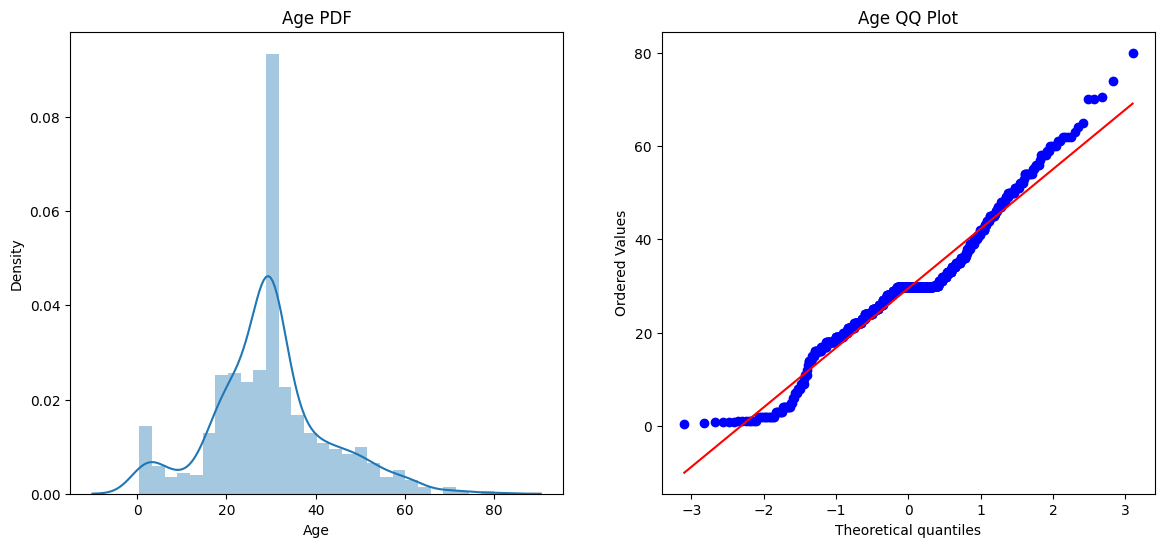

In [28]:
### **How to find if data is normal?**
# sns.histplot(kde=True) visualization
# pandas skew() = 0
# QQ-Plot(statistic)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.distplot(X_train['Age'])
plt.title("Age PDF")

plt.subplot(1, 2, 2)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot")

plt.show()

/tmp/ipykernel_8939/391024720.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


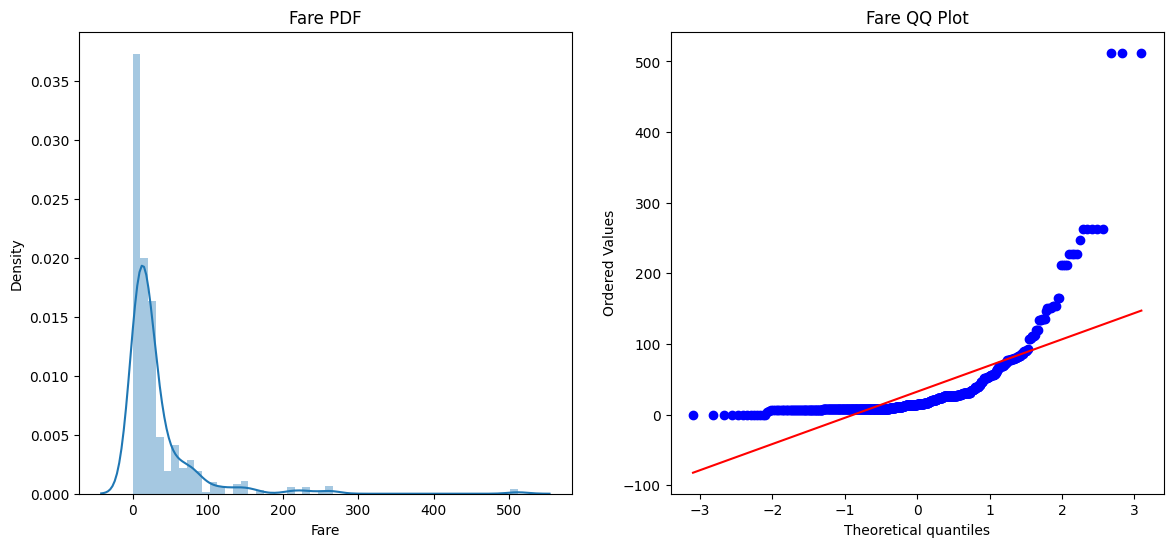

In [27]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.distplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(1, 2, 2)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot")

plt.show()